# Série TP 4 – Fouille de Données – Naive Bayes

## La classification naive bayesienne : CategoricalNB & GaussianNB de scikit-learn

Doc : https://scikit-learn.org/stable/modules/naive_bayes.html & https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

Naive Bayes Classifiers in sklearn : **GaussianNB**, **CategoricalNB**, BernoulliNB, MultinomialNB, ComplementNB.

CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data.

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

### Import necessary modules : scikit-learn package

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Load & explore the dataset : Exercice 2 - Série TD 2

In [9]:
lst_data = [
    ['jeune', 'f', 'v', 'faible'],
    ['jeune', 'v', 'v', 'eleve'],
    ['adulte', 'f', 'f', 'faible'],
    ['senior', 'v', 'f', 'eleve'],
    ['senior', 'f', 'v', 'moyen'],
    ['jeune', 'f', 'f', 'faible'],
    ['adulte', 'v', 'f', 'moyen'],
    ['adulte', 'v', 'v', 'moyen'],
    ['senior', 'f', 'f', 'faible'],
    ['senior', 'v', 'v', 'eleve'],
]

In [87]:
df = pd.DataFrame(lst_data, columns=['age', 'S1', 'S2', 'risque'])

df

,age,S1,S2,risque
0,jeune,f,v,faible
1,jeune,v,v,eleve
2,adulte,f,f,faible
3,senior,v,f,eleve
4,senior,f,v,moyen
5,jeune,f,f,faible
6,adulte,v,f,moyen
7,adulte,v,v,moyen
8,senior,f,f,faible
9,senior,v,v,eleve


In [88]:
df.shape

(10, 4)

In [89]:
df.describe()

,age,S1,S2,risque
count,10,10,10,10
unique,3,2,2,3
top,senior,v,f,faible
freq,4,5,5,4


In [13]:
df['age'].value_counts()

senior    4
adulte    3
jeune     3
Name: age, dtype: int64

In [14]:
np.unique(df['age'])

array(['adulte', 'jeune', 'senior'], dtype=object)

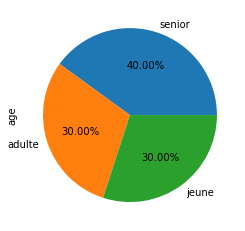

In [15]:
df['age'].value_counts().plot(kind='pie', autopct='%.2f%%')
# plt.pie(df['temp'].value_counts(), labels=np.unique(df['age']), autopct='%.2f')
plt.show()

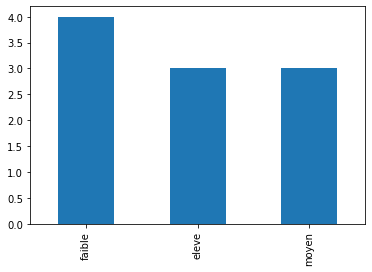

In [16]:
df['risque'].value_counts().plot(kind='bar')
plt.show()

### Split the DataFrame into features (X) and target/class (y) 

In [90]:
X = df[['age', 'S1', 'S2']]
y = df[['risque']]

### Create training and test sets : 70% of it is in the training set, and 30% of it is in the testing set.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [92]:
X_train.shape

(7, 3)

In [93]:
X_test.shape

(3, 3)

In [155]:
X_train

,age,S1,S2
0,jeune,f,v
7,adulte,v,v
2,adulte,f,f
9,senior,v,v
4,senior,f,v
3,senior,v,f
6,adulte,v,f


In [156]:
y_train

,risque
0,faible
7,moyen
2,faible
9,eleve
4,moyen
3,eleve
6,moyen


### Encode categorical data as numbers : LabelEncoding

Une machine ne peut comprendre que les nombres. Elle ne peut pas comprendre le texte. C'est aussi essentiellement le cas avec les algorithmes d'apprentissage automatique. 

C'est principalement la raison pour laquelle nous devons convertir les colonnes catégorielles en colonnes numériques afin que l'algorithme le comprenne. Ce processus est appelé l'encodage catégoriel (Encoding).

**L'encodage catégoriel est un processus de conversion de catégories en nombres.**

Besoin donc de transformation de nos données catégorielles en valeurs numériques.

Deux techniques les plus utilisées : Label Encodage et One Hot Ecoding.

- Label Encoding : Chaque catégorie se voit attribuer un entier unique basé sur l'ordre alphabétique.

- One Hot Encoding : Un encodage à chaud crée de nouvelles colonnes (binaires), indiquant la présence de chaque valeur possible à partir des données d'origine.

In [94]:
X_train_le = X_train.apply(LabelEncoder().fit_transform)

X_train_le

,age,S1,S2
0,1,0,1
7,0,1,1
2,0,0,0
9,2,1,1
4,2,0,1
3,2,1,0
6,0,1,0


#### Showing Encoding results

In [95]:
le_df = pd.DataFrame(X_train_le, columns=X_train.columns)

le_df.head()

,age,S1,S2
0,1,0,1
7,0,1,1
2,0,0,0
9,2,1,1
4,2,0,1


### Training phase : create the classifier & fit it on the encoded training data

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [142]:
clf_le = CategoricalNB()

clf_le.fit(X_train_le, y_train.values.ravel())

CategoricalNB()

### Evaluate the predictive performance : Accuracy

In [143]:
X_test_le = X_test.apply(LabelEncoder().fit_transform)

y_preds = clf_le.predict(X_test_le)

In [144]:
print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6666666666666666


In [149]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       eleve       0.00      0.00      0.00         1
      faible       1.00      1.00      1.00         2
       moyen       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classificat

### Zero Frequency/Probablity Problem

Si une classe individuelle est manquante, l'estimation de probabilité basée sur la fréquence sera de zéro. Et nous obtiendrons un zéro lorsque toutes les probabilités seront multipliées.

Une approche pour surmonter ce problème consiste à ajouter 1 (**alpha**) au compte pour chaque combinaison valeur d'attribut-classe lorsqu'une valeur d'attribut n'apparaît pas avec chaque valeur de classe.

alpha = 1 is called **Laplace smoothing**, & alpha > 1 is called **Lidstone smoothing**. Defaut = 1.

Cela entraînera la suppression de toutes les valeurs nulles des classes et, en même temps, n'aura pas d'impact sur la fréquence relative globale des classes.

In [145]:
clf_le.alpha

1.0

### Predict one sample : ['jeune', 'v', 'f']

In [146]:
clf_le.predict([[1, 1, 0]])

array(['eleve'], dtype='<U6')

In [150]:
clf_le.predict_proba([[1, 1, 0]]) # ['Eleve', 'Faible', 'Moyen']

array([[0.40540541, 0.27027027, 0.32432432]])

### Plot confusion matrix 

In [112]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_preds)

print(cf_matrix)

[[0 0 1]
 [0 2 0]
 [0 0 0]]


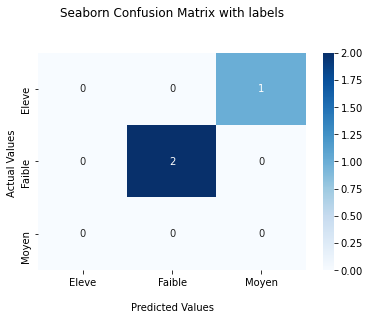

In [113]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Eleve', 'Faible', 'Moyen'])
ax.yaxis.set_ticklabels(['Eleve', 'Faible', 'Moyen'])

## Display the visualization of the Confusion Matrix
plt.show()

In [129]:
from sklearn.metrics import precision_score, recall_score

# precision = tp / (tp + fp)
print(recall_score(y_test, y_preds, pos_label=['neg'], average='micro'))

# recall = tp / (tp + fn)
print(recall_score(y_test, y_preds, pos_label=['neg'], average='micro'))

0.6666666666666666
0.6666666666666666


C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to ['neg']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\LeE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to ['neg']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


## OneHotEncoding

In [65]:
ohe = OneHotEncoder()

ohe.fit(X_train)

OneHotEncoder()

In [66]:
X_train_ohe = ohe.transform(X_train).toarray()

X_train_ohe

array([[0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0.]])

In [68]:
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,age_adulte,age_jeune,age_senior,S1_f,S1_v,S2_f,S2_v
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [81]:
clf = CategoricalNB()

clf.fit(X_train_ohe, y_train.values.ravel())

CategoricalNB()

In [82]:
X_test_ohe = ohe.transform(X_test).toarray()

y_preds = clf.predict(X_test_ohe)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_preds))

In [83]:
clf.predict([[0, 1, 0, 0, 1, 1, 0]])

array(['eleve'], dtype='<U6')

In [85]:
clf.predict_proba([[0, 1, 0, 0, 1, 1, 0]])

array([[0.4822554 , 0.21433573, 0.30340886]])